In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("./dataset/tracks_df.csv")

## Pre-processamento

### Geração de coluna de description para embedding posterior

In [15]:
df['description'] = df.apply(lambda row: f"Artist {row['artist']} with song {row['track']} tagged by:{row['tags']}", axis=1)


### Criação de embedding

In [17]:
from sentence_transformers import SentenceTransformer

model = "sentence-transformers/paraphrase-multilingual-mpnet-base-v2"
song_model = SentenceTransformer(model)

song_embeddings = song_model.encode(df['description'].tolist(), show_progress_bar=True)

c:\Users\gears\Desktop\TripTrack\ai-research\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\gears\Desktop\TripTrack\ai-research\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\gears\.cache\huggingface\hub\models--sentence-transformers--paraphrase-multilingual-mpnet-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mo

## Analise dos dados

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=41)
df['cluster'] = kmeans.fit_predict(song_embeddings)

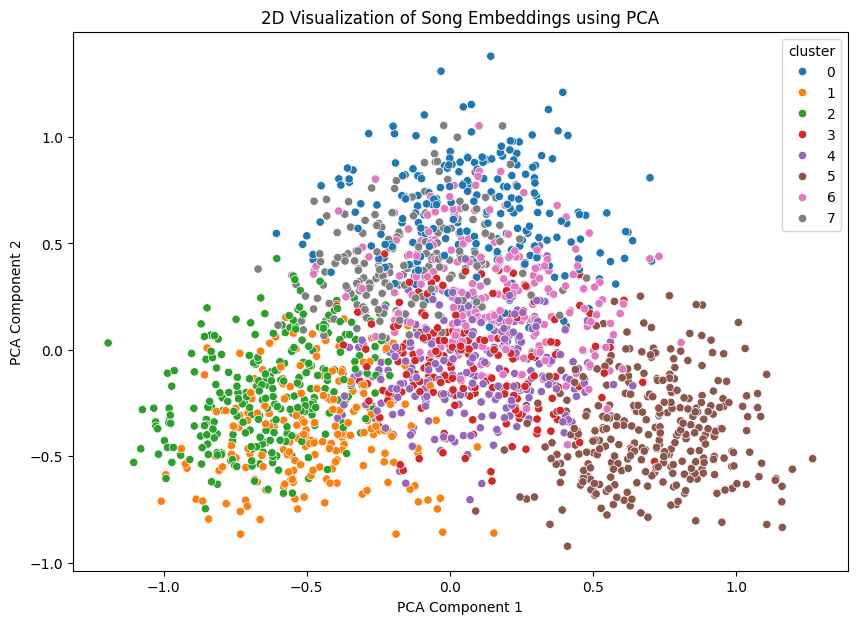

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
song_embeddings_2d = pca.fit_transform(song_embeddings)


plt.figure(figsize=(10, 7))
sns.scatterplot(x=song_embeddings_2d[:, 0], y=song_embeddings_2d[:, 1], hue=df["cluster"], palette="tab10", legend="full")
plt.title('2D Visualization of Song Embeddings using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### Analise de musicas para cada cluster

In [51]:
for i in range(8):
    cluster_songs = df[df['cluster'] == i][['artist', 'track']].head(10)
    print(f"Cluster {i} top songs:")
    print(cluster_songs.to_string(index=False))
    print("\n")

Cluster 0 top songs:
       artist           track
 Taylor Swift     Blank Space
 Taylor Swift    Cruel Summer
 Taylor Swift    Shake It Off
 Taylor Swift           Style
Ariana Grande         7 rings
Ariana Grande        Into You
Ariana Grande   One Last Time
Ariana Grande   thank u, next
Ariana Grande Dangerous Woman
    Lady Gaga      Poker Face


Cluster 1 top songs:
           artist                          track
        Radiohead                          Creep
        Radiohead                   Karma Police
        Radiohead               Paranoid Android
The Neighbourhood                Sweater Weather
The Neighbourhood                       Softcore
The Neighbourhood                         Afraid
         Paramore                Misery Business
         Paramore            That's What You Get
         Deftones Change (In the House of Flies)
         Deftones       My Own Summer (Shove It)


Cluster 2 top songs:
        artist                                                tr

### Implementação de coluna com vibes 

In [52]:
cluster_vibe = {
    0: "Confident",
    1: "Determined",
    2: "Nostalgic",
    3: "Reflective",
    4: "Euphoric",
    5: "Energetic",
    6: "Calm",
    7: "Melancholic",
}

for i in range(8):
    cluster_songs = df[df['cluster'] == i][['artist', 'track']].head(10)
    vibe = cluster_vibe.get(i, "Unknown Vibe")
    df["vibe"] = df["cluster"].map(cluster_vibe)
    

## Exportação dos dados

In [54]:
df.to_csv("./dataset/tracks_with_clusters.csv", index=False)